<a href="https://colab.research.google.com/github/maslovalyudmila/maslovalyudmila.github.io/blob/master/Maslova_2d_goup_Task1_Rented_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

# отключим предупреждения анаконды
import warnings
warnings.simplefilter('ignore')

# подключим отображение графиков
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# настроим формат графиков
%config InlineBackend.figure_format = 'svg'

# увеличим размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [119]:
df = pd.read_csv('/content/drive/My Drive/houses_to_rent_v2.csv') # Read first 5 rows of our dataset.
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [33]:
print(df.shape)

(10692, 13)


In [0]:
# The dataset contains 13 features of houses to rent and consists of 10692 rows with data.
# The target variable is total rent amount, quantitative feature.
# Our task is to define best demand, so we need to analyze factors which influence on total rent amount.

In [34]:
print(df.columns)

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')


In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB
None


In [0]:
# As we see the datacet includes 13 features, 9 of them are quantitive and 4 are categorical.
# Also there's no dropped values.

In [18]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.00,10692.00,10692.00,10692.00,1.07e+04,10692.00,10692.00,10692.00,1.07e+04
mean,149.22,2.51,2.24,1.61,1.17e+03,3896.25,366.70,53.30,5.49e+03
std,537.02,1.17,1.41,1.59,1.56e+04,3408.55,3107.83,47.77,1.65e+04
min,11.00,1.00,1.00,0.00,0.00e+00,450.00,0.00,3.00,4.99e+02
25%,56.00,2.00,1.00,0.00,1.70e+02,1530.00,38.00,21.00,2.06e+03
50%,90.00,2.00,2.00,1.00,5.60e+02,2661.00,125.00,36.00,3.58e+03
75%,182.00,3.00,3.00,2.00,1.24e+03,5000.00,375.00,68.00,6.77e+03
max,46335.00,13.00,10.00,12.00,1.12e+06,45000.00,313700.00,677.00,1.12e+06


In [19]:
df.describe(include=['object'])

,city,floor,animal,furniture
count,10692,10692,10692,10692
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5887,2461,8316,8086


In [0]:
# Here we see the distribution of categorical variables.
# The leader by amount of houses to rent is São Paulo.
# There is high amount of houses without floors, hence the variation is from 0 to 35.
# Houses are more often rented with no furniture.
# Animals are more often accepted to keep in houses then not.

In [35]:
df['city'].value_counts(normalize='True') # Count the relative frequency of categorical variable 'city'.

São Paulo         0.55
Rio de Janeiro    0.14
Belo Horizonte    0.12
Porto Alegre      0.11
Campinas          0.08
Name: city, dtype: float64

In [0]:
# As we see São Paulo ranks the half of present sample.

In [120]:
df.sort_values(by=['total (R$)', 'rent amount (R$)', 'city'], ascending=[False, False, False]).head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64,38,1120000
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700,32,316900
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000,153,233200
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834,254,222100


In [0]:
# Here, grouping data by initial rent amount, total rent amount and the city,
# we defined the leader of the largest amount of total rent, Belo Horizonte.
# But also we noticed the great variation between initial and total rent amount,
# and quite large amount of hoa, serving houses in Brazil.

In [68]:
df['total (R$)'].mean()

5490.4869996258885

In [0]:
# So we defined the average total rent amount in Brazil, basing on present data.

In [56]:
df['hoa (R$)'].mean()

1174.0216984661429

In [0]:
# The average amount of hoa among in the cities.

In [74]:
df[df['total (R$)'] <= 5490.49].mean()

area                     89.34
rooms                     2.09
bathroom                  1.62
parking spaces            1.04
hoa (R$)                509.32
rent amount (R$)       2085.10
property tax (R$)       114.14
fire insurance (R$)      28.62
total (R$)             2737.35
dtype: float64

In [0]:
# Index the values of house features provided by average total rent amount.
# We see average total rent amount generally includes two rooms, one bathroom and one parking space.

In [78]:
df[df['total (R$)'] <= 5490.49]['hoa (R$)'].mean() # Count the average hoa amount.

509.317327479764

In [121]:
df[(df['total (R$)'] <= 5490.49) & (df['furniture'] == 'not furnished')]['area'].max()

12732

In [0]:
# The maximum house area without furniture to rent by average total amount is 12 732 square meters.

In [174]:
df[(df['total (R$)'] <= 5490.49) & (df['rooms'] == 1)]['area'].min()

11

In [0]:
# The maximum area of one room by this total amount to rent is 11 square meters.

In [176]:
df.apply(np.max) 

city                       São Paulo
area                           46335
rooms                             13
bathroom                          10
parking spaces                    12
floor                              9
animal                     not acept
furniture              not furnished
hoa (R$)                     1117000
rent amount (R$)               45000
property tax (R$)             313700
fire insurance (R$)              677
total (R$)                   1120000
average_room_price           2.2e+03
best_demand                     True
dtype: object

In [175]:
df.apply(np.min)

city                   Belo Horizonte
area                               11
rooms                               1
bathroom                            1
parking spaces                      0
floor                               -
animal                          acept
furniture                   furnished
hoa (R$)                            0
rent amount (R$)                  450
property tax (R$)                   0
fire insurance (R$)                 3
total (R$)                        499
average_room_price            2.2e+03
best_demand                     False
dtype: object

In [0]:
# The most frequent city to rent is São Paulo. The most recent is Belo Horizonte.

In [99]:
columns_to_show = ['total (R$)', 'rent amount (R$)', 'hoa (R$)']

df.groupby(['city'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total (R$)                 ...  hoa (R$)              
                     mean       std amin  ...       std amin     amax
city                                      ...                        
Belo Horizonte    6315.24  44654.83  499  ...  44504.53    0  1117000
Campinas          3173.28   2857.28  711  ...    675.84    0     7400
Porto Alegre      2989.78   2734.50  509  ...   1052.58    0    32000
Rio de Janeiro    4611.68   4425.36  507  ...   2237.15    0    81150
São Paulo         6380.83   7541.32  508  ...   4076.46    0   220000

[5 rows x 12 columns]

In [0]:
# As we see the highest average total rent amount is in Belo Horizone and São Paulo.
# Moreover, on average houses in São Paulo are rented by higher initial amount then in Belo Horizonte.
# Belo Horizone has the highest amount of hoa service. The lawest is in Porto Alegre.

In [108]:
pd.crosstab(df['city'], df['rooms'])

rooms,1,2,3,4,5,6,7,8,9,10,13
city,,,,,,,,,,,
Belo Horizonte,150,286,389,317,78,20,13,4,0,1,0
Campinas,218,253,271,91,14,4,2,0,0,0,0
Porto Alegre,374,424,299,62,22,9,1,2,0,0,0
Rio de Janeiro,404,522,422,128,18,3,3,0,0,0,1
São Paulo,1308,1490,1888,988,156,32,17,5,1,2,0


In [122]:
pd.crosstab(df['rooms'], df['furniture'])

furniture,furnished,not furnished
rooms,,
1,860,1594
2,575,2400
3,712,2557
4,383,1203
5,50,238
6,13,55
7,13,23
8,0,11
9,0,1


In [125]:
pd.crosstab(df['furniture'], df['animal'])

animal,acept,not acept
furniture,,
furnished,1859,747
not furnished,6457,1629


In [0]:
# On present tables we see houses are frequently rented unfurnitured.
# Also we can notice a connection between the absence of furniture and possibility of keeping animals.

In [157]:
df.pivot_table(['total (R$)', 'rent amount (R$)', 'hoa (R$)', 'area', 'property tax (R$)'], 
['city'], aggfunc='mean').head()

,area,hoa (R$),property tax (R$),rent amount (R$),total (R$)
city,,,,,
Belo Horizonte,207.41,2324.20,272.78,3664.13,6315.24
Campinas,137.56,628.92,147.66,2364.29,3173.28
Porto Alegre,103.61,491.62,124.02,2337.70,2989.78
Rio de Janeiro,105.35,1079.43,256.85,3232.90,4611.68
São Paulo,158.90,1169.63,495.70,4652.79,6380.83


In [0]:
# We see on average area to rent is larger in Belo Horizonte. 
# There can be noticed the higher property tax in São Paulo and total rent amount.

In [133]:
pd.crosstab(df['city'], df['rooms'], margins=True)

rooms,1,2,3,4,5,6,7,8,9,10,13,All
city,,,,,,,,,,,,
Belo Horizonte,150,286,389,317,78,20,13,4,0,1,0,1258
Campinas,218,253,271,91,14,4,2,0,0,0,0,853
Porto Alegre,374,424,299,62,22,9,1,2,0,0,0,1193
Rio de Janeiro,404,522,422,128,18,3,3,0,0,0,1,1501
São Paulo,1308,1490,1888,988,156,32,17,5,1,2,0,5887
All,2454,2975,3269,1586,288,68,36,11,1,3,1,10692


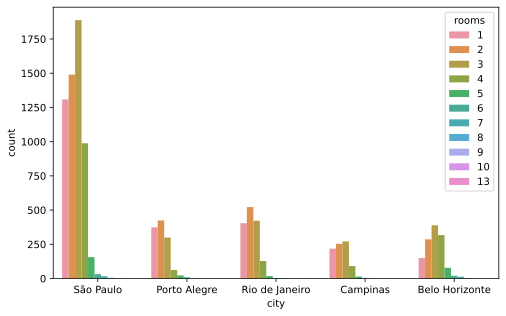

In [155]:
sns.countplot(x='city', hue='rooms', data=df);
plt.savefig('rooms_and_city.svg');

In [0]:
# The vizualization showed the largest amount of rooms in houses to rent is in São Paulo.
# The fewest is in Campinas.
# Average amount of rooms is most frequenly demanded reaches three in São Paulo, Belo Horizonte and Campinas.
# In other cities there are two-roomed houses are frequently rented.

In [152]:
df['best_demand'] = (df['total (R$)'] <= 5490.49)

pd.crosstab(df['best_demand'], df['city'], margins=True)

city,Belo Horizonte,Campinas,Porto Alegre,Rio de Janeiro,São Paulo,All
best_demand,,,,,,
False,341,110,117,380,2455,3403
True,917,743,1076,1121,3432,7289
All,1258,853,1193,1501,5887,10692


In [0]:
# We define the best demand for average renter in Brazil.
# By forming this cross table we can see the highest amount of houses provided best demand
# is located in São Paulo.

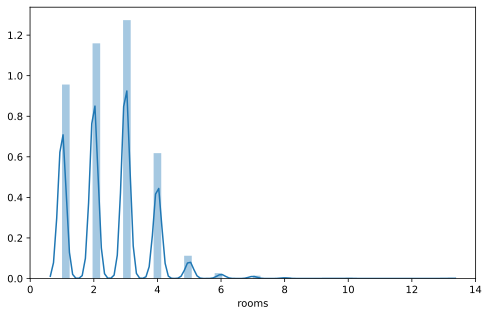

In [165]:
sns.distplot(df.rooms)

In [0]:
# Three-roomed houses on average are frequently rented.

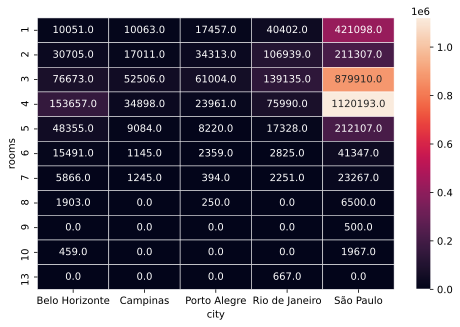

In [170]:
platform_genre_sales = df.pivot_table(
                        index='rooms', 
                        columns='city', 
                        values='property tax (R$)', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [0]:
# Looking at this picture we see São Paulo has the highest property tax depending on room amount.

In [0]:
# CONCLUSION

# We analyzed the data which present the market of rented real estate in Brazil on march 2020.
# As target variable we investigated the total rent amount do define best demand for the clients.
# The task included to compare different features which constitute the total rent amount.
# The analyze identified that the leader of rented real estate is São Paulo.
# So as Brazil's financial center it is most poluous city, which explains the high amount of
# rented houses (55%) and level of tax property in comparison with other cities. 
# What is interesting, the capital Rio de Janeiro is much less popular among renters, possibly
# due to high criminal level in favela.
# Quite large total rent amount may be explained by high contribution to hoa, also because of country's climate. 
# But there must be taken into account the phenomenon of 'brazilian price'.

# Finally the analyze showed the best demand of rented real estate includes total rent amount beginning from
# 5490,50 BRL; 2 rooms on average, 1 bathroom, 1 parking space, unfurnitured, possible for keeping animals.

# So we can suppose the target client are families with children or couples.